## eigh - Hermit's matrix

In [128]:
"""
numpy.linalg.eigh - Return the eigenvalues and eigenvectors of a complex Hermitian (conjugate symmetric) or a real symmetric matrix.
Returns two objects, a 1-D array containing the eigenvalues of a, 
and a 2-D square array or matrix (depending on the input type) of the corresponding eigenvectors (in columns).
"""
import numpy as np
from numpy import linalg as LA
a = np.array([[1, -2j], [2j, 5]])
w, v = LA.eigh(a)
print("eigenvalues:")
print(w)
print("eigenvectors:")
print(v)

eigenvalues:
[0.17157288 5.82842712]
eigenvectors:
[[-0.92387953+0.j         -0.38268343+0.j        ]
 [ 0.        +0.38268343j  0.        -0.92387953j]]


## characteristic polynomial

In [129]:
"""
 charpoly(x='lambda', simplify=<function simplify>)

    Computes characteristic polynomial det(x*I - M) where I is the identity matrix.
    A PurePoly is returned, so using different variables for x does not affect the comparison or the polynomials:
"""
from sympy import Matrix
from sympy.abc import x, y

M = Matrix([[1., 3], [2, 0]])
M.charpoly()

PurePoly(1.0*lambda**2 - 1.0*lambda - 6.0, lambda, domain='RR')

In [130]:
# Pre-defined symbols
# Stopped here. 
x, y

(x, y)

In [131]:
M.charpoly(x) == M.charpoly(y)

True

## Eigendecomposition

In [132]:
from matplotlib import pyplot as plt
A = np.array([[-1, 3], [2, -2]])
v = np.array([[2], [1]])

In [133]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)
        
    plt.grid()


We can now use this function to plot our vector v:

(-1.0, 4.0)

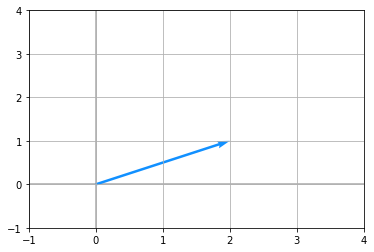

In [134]:
plotVectors([v.flatten()], cols=['#1190FF'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)


Now, let’s apply the matrix A to this vector. We’ll plot the old vector v (light blue) and the new one (orange):

[[1]
 [2]]


(-1.0, 4.0)

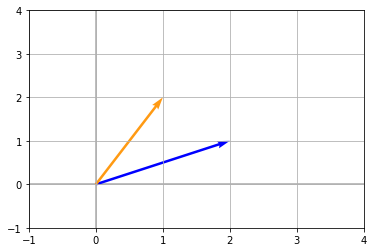

In [135]:
Av = A.dot(v)
print(Av)
# plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plotVectors([v.flatten(), Av.flatten()], cols=['blue', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)


## Find eigenvalues and eigenvectors in Python

In [136]:
A = np.array([[5, 1], [3, 3]])
np.linalg.eig(A)


(array([6., 2.]), array([[ 0.70710678, -0.31622777],
        [ 0.70710678,  0.9486833 ]]))

(-1.0, 3.0)

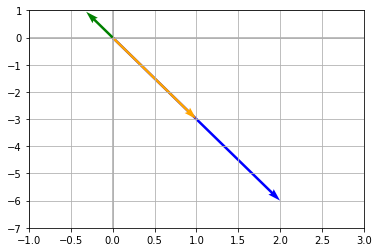

In [137]:
v = np.array([[1], [-3]])
Av = A.dot(v)
v_np = [-0.31622777, 0.9486833]

plotVectors([Av.flatten(), v.flatten(), v_np], cols=['blue', 'orange', 'green'])
plt.ylim(-7, 1)
plt.xlim(-1, 3)

We can see that the vector found with Numpy (in dark blue) is a scaled version of our preceding [1 −3].

## Compute Jordan normal form of matrix in Python

In [138]:
"""
source - https://docs.sympy.org/latest/modules/matrices/matrices.html
jordan_form(calc_transform=True, **kwargs)[source]
    Return (P,J)
where J is a Jordan block matrix and P is a matrix such that M=PJP−1
"""
from sympy import Matrix
a = np.array([[5, 4, 2, 1], 
              [0, 1, -1, -1], 
              [-1, -1, 3, 0], 
              [1, 1, -1, 2]])
m = Matrix(a)

P, J = m.jordan_form()
print("Jordan block matrix")
J

Jordan block matrix


Matrix([
[1, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 4, 1],
[0, 0, 0, 4]])

# Deflation

[TEXAS](https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_EigenProblem1.html)

## What is KryPy

In [139]:
!pip install krypy

In [140]:
from numpy import diag, linspace, ones
import krypy

# construct the linear system
A = diag(linspace(1, 2, 20))
A[0, 0] = -1e-5
b = ones(20)
sol, out = krypy.minres(A, b)

In [141]:
# %%script false
A = np.array([[2,3],[3,2]])
b = ones(2)
sol, out = krypy.minres(A, b)

In [142]:
sol

array([0.2, 0.2])

In [150]:
A@sol

array([1., 1.])

In [143]:
out

krypy MINRES object
    MMlr0 = [[1.], ..., [1.]]
    MMlr0_norm = 1.4142135623730951
    MlAMr: 2 x 2 matrix
    Mlr0: [[1.], ..., [1.]]
    flat_vecs: True
    store_arnoldi: False
    ortho: mgs
    tol: 1e-05
    maxiter: 2
    iter: 0
    explicit residual: False
    resnorms: [1.0, ..., 2.220446049250313e-16]
    x0: [[0.], ..., [0.]]
    xk: [[0.2], ..., [0.2]]

The variable sol contains the solution as a numpy.array, out holds more information like the residual norms etc.

In [144]:
from numpy import diag, linspace, ones 
from krypy.linsys import LinearSystem, Minres
A = diag(linspace(1, 2, 20)) 
A[0, 0] = -1e-5 
b = ones(20)
linear_system = LinearSystem(A, b, self_adjoint=True) # solve the linear system (approximate solution is solver.xk) 
solver = Minres(linear_system)


In [151]:
A = np.array([[2,3],[3,2]])
b = ones(2)
linear_system = LinearSystem(A, b, self_adjoint=True) # solve the linear system (approximate solution is solver.xk) 
solver = Minres(linear_system)

solver._solve(linear_system)

TypeError: ignored

In [156]:
?solver._solve

In [146]:
linear_system

LinearSystem {
  A: array([[2, 3],
       [3, 2]])
  b: array([[1.],
       [1.]])
  normal: True
  self_adjoint: True
  positive_definite: False
}

In [147]:
solver

krypy MINRES object
    MMlr0 = [[1.], ..., [1.]]
    MMlr0_norm = 1.4142135623730951
    MlAMr: 2 x 2 matrix
    Mlr0: [[1.], ..., [1.]]
    flat_vecs: True
    store_arnoldi: False
    ortho: lanczos
    tol: 1e-05
    maxiter: 2
    iter: 0
    explicit residual: False
    resnorms: [1.0, ..., 2.220446049250313e-16]
    x0: [[0.], ..., [0.]]
    xk: [[0.2], ..., [0.2]]

In [148]:
# from krypy.deflation import DeflatedMinres
# dsolver = DeflatedMinres(linear_system, U=np.eye(20, 1))
# dsolver

## Recycling
The deflation subspace can also be determined automatically with a recycling strategy. Just for illustration, the same linear system is solved twice in the following code:

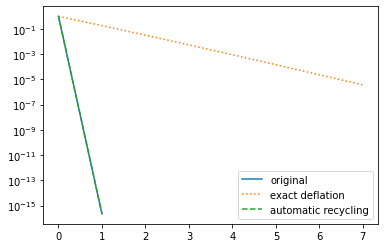

In [149]:
from krypy.recycling import RecyclingMinres

# get recycling solver with approximate Krylov subspace strategy
rminres = RecyclingMinres(vector_factory='RitzApproxKrylov')

# solve twice
rsolver1 = rminres.solve(linear_system)
rsolver2 = rminres.solve(linear_system)

from matplotlib.pyplot import semilogy, show, legend
semilogy(solver.resnorms, label='original')
semilogy(dsolver.resnorms, label='exact deflation', ls='dotted')
semilogy(rsolver2.resnorms, label='automatic recycling', ls='dashed')
legend()
show()